# **I. Data Cleaning and Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


!pip install bubbly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bubbly.bubbly import bubbleplot



#Import dữ liệu từ CSV
df15 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2015.csv')
df16 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2016.csv')
df17 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2017.csv')
df18 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2018.csv')
df19 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2019.csv')
df20 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2020.csv')
df21 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2021.csv')
df22 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/2022.csv')

#Thêm cột Year vào từng bảng Data
df15['Year'] = 2015
df16['Year'] = 2016
df17['Year'] = 2017
df18['Year'] = 2018
df19['Year'] = 2019
df20['Year'] = 2020
df21['Year'] = 2021
df22['Year'] = 2022

#Kiểm tra dữ liệu đã đồng nhất tên cột hay chưa?
sets = [df15, df16, df17, df18, df19, df20, df21, df22]
for i in sets:
    print(i.info())

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5416 sha256=2403dc1c1c30a6f6f7d87dd02d38ccb97d103392f722efaad29acf7b119138f0
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)   

## 1.Xác định các cột giá trị để chuẩn hoá




In [ ]:
#Chuẩn hóa tên cột cần lấy của từng bảng dữ liệu

df15 = df15.rename(columns = {
    'Family' : 'Social support'})

df16 = df16.rename(columns = {
    'Family' : 'Social support'})

df17 = df17.rename(columns = {
    'Happiness.Score' : 'Happiness Score',
    'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
    'Trust..Government.Corruption.' : 'Trust (Government Corruption)',
    'Family' : 'Social support',
    'Dystopia.Residual' : 'Dystopia Residual'})

df18 = df18.rename(columns = {
    'Country or region' : 'Country',
    'Score' : 'Happiness Score',
    'GDP per capita' : 'Economy (GDP per Capita)',
    'Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})

df19 = df19.rename(columns = {
    'Country or region' : 'Country',
    'Score' : 'Happiness Score',
    'GDP per capita' : 'Economy (GDP per Capita)',
    'Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})

df20 = df20.rename(columns = {
    'Country name' : 'Country',
    'Ladder score' : 'Happiness Score',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})
df20['Economy (GDP per Capita)'] = df20['Logged GDP per capita'] / 10
df20['Health (Life Expectancy)'] = df20['Healthy life expectancy'] / 100

df21 = df21.rename(columns = {
    'Country name' : 'Country',
    'Ladder score' : 'Happiness Score',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})
df21['Economy (GDP per Capita)'] = df21['Logged GDP per capita'] / 10
df21['Health (Life Expectancy)'] = df21['Healthy life expectancy'] / 100

df22 = df22.rename(columns = {
    'Happiness score' : 'Happiness Score',
    'Explained by: GDP per capita' : 'Economy (GDP per Capita)',
    'Explained by: Social support' : 'Social support',
    'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)',
    'Explained by: Freedom to make life choices' : 'Freedom',
    'Explained by: Generosity' : 'Generosity',
    'Explained by: Perceptions of corruption' : 'Trust (Government Corruption)'})

#Gộp dữ liệu các bảng
df = pd.concat([df15, df16, df17, df18, df19, df20, df21, df22])[[
    'Country',
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Social support',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Year']]

#Xoá dữ liệu không hợp lệ
df = df.dropna(axis=0,thresh=3)
#Kiểm tra còn giá trị NaN nào không?
df.isnull().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

In [ ]:
#Chuẩn hóa dữ liệu

df['Happiness Score'] =  df['Happiness Score'].apply(lambda x: str(x).replace(',', '.'))
df['Economy (GDP per Capita)'] =  df['Economy (GDP per Capita)'].apply(lambda x: str(x).replace(',', '.'))
df['Social support'] =  df['Social support'].apply(lambda x: str(x).replace(',', '.'))
df['Health (Life Expectancy)'] =  df['Health (Life Expectancy)'].apply(lambda x: str(x).replace(',', '.'))
df['Freedom'] =  df['Freedom'].apply(lambda x: str(x).replace(',', '.'))
df['Trust (Government Corruption)'] =  df['Trust (Government Corruption)'].apply(lambda x: str(x).replace(',', '.'))
df['Generosity'] =  df['Generosity'].apply(lambda x: str(x).replace(',', '.'))

#Chuyển kiểu dữ liệu
df = df.astype({
    'Happiness Score' : 'float32',
    'Economy (GDP per Capita)' : 'float32',
    'Social support' : 'float32',
    'Health (Life Expectancy)' : 'float32',
    'Freedom' : 'float32',
    'Trust (Government Corruption)' : 'float32',
    'Generosity' : 'float32'
    })

#Xuất dữ liệu đã được làm sạch để sử dụng khi Train & Forecast Data.
df.to_csv('df1522.csv', index=False)
df.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## 2.Phân tích dữ liệu và sử dụng các biểu đồ để mô tả dữ liệu

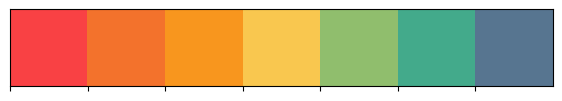

In [ ]:
#Thay đổi màu sắc để dễ quan sát biểu đồ
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

### Biểu đồ xem xét độ tăng trưởng Happiness Score của Việt Nam trong Đông Nam Á từ 2015 - 2022

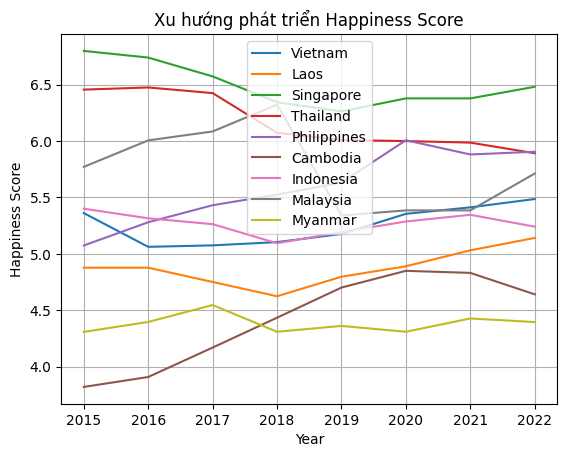

In [ ]:
#Vẽ biểu đồ xem xét độ tăng trưởng Happiness Score của Việt Nam trong Đông Nam Á
columns_to_plot = df[['Country', 'Year', 'Happiness Score']]
grouped_data = df.groupby(['Country', 'Year'])['Happiness Score'].mean().reset_index()

list_of_countries = ['Vietnam', 'Laos', 'Singapore', 'Thailand', 'Philippines', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar']
for country in list_of_countries:
    country_data = grouped_data[grouped_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Score'], label=country)

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Xu hướng phát triển Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

Từ biểu đồ trên, ta thấy Việt Nam đang có chỉ số hạnh phúc được đánh giá dao động trong mức trung bình tại Đông Nam Á với số điểm Happiness Score từ 5.0 - 5.5. Tuy nhiên, Việt Nam đang có sự phát triển rõ rệt qua các năm từ 2016 - 2022.

### Bản đồ thế giới về Happiness Score Report 2022


In [ ]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Happiness Score',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

Từ bản đồ trên, ta thấy các nước trong khu vực Tây Âu và Bắc Mỹ có chỉ số Happiness Score cao trong khoảng 6.0 - 7.2.

=> Những khu vực như Tây Âu và Bắc Mỹ là những khu vực đáng sống.

### Biểu đồ Heatmap trực quan hoá ma trận tương quan giữa các giá trị

<ipython-input-18-e19a25ffed1a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-18-e19a25ffed1a>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



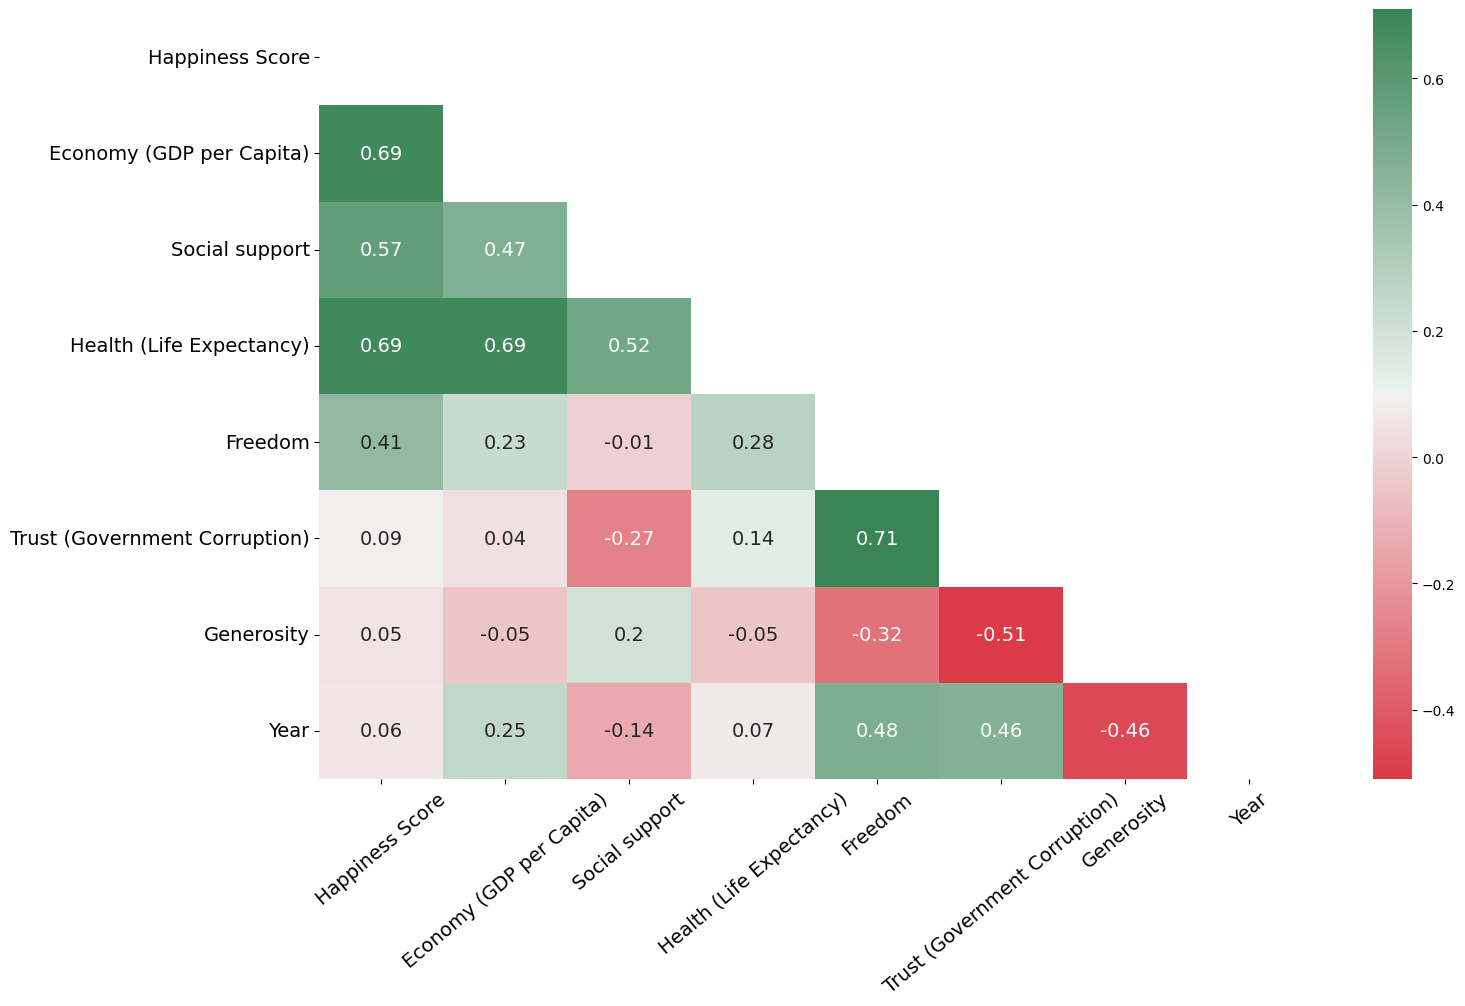

In [ ]:
#Tạo biểu đồ Heatmap
mask = np.zeros_like(df.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

#Vẽ biểu đồ Heatmap
cmap = sns.diverging_palette(10, 500, as_cmap=True)

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr().round(2), mask = mask, cmap=cmap, annot= True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize = 14, rotation = 40)
plt.yticks(fontsize = 14);

Biểu đồ Heatmap trên thể hiện sự tương quan giữa các giá trị, trong đó các giá trị có sự ảnh hưởng lớn đến Happiness Score là Freedom, Health, Social Support và Economy.

### Biểu đồ bong bóng về Tuổi thọ(Life expectancy) và Kinh tế(GDP per Capita) với Happiness Score của các nước trong khu vực Đông Nam Á

In [ ]:
short = df[df['Country'].isin (list_of_countries)]
fig = px.scatter(short.query("Year==2022"), x="Health (Life Expectancy)", y="Happiness Score",
	    size="Economy (GDP per Capita)",
      color="Country",
      hover_name="Country", log_x=True, size_max=60)

fig.show()

Trong năm 2022, Việt Nam đang thể hiện chỉ số Happiness Score, GDP và Health nằm trong nhóm trung bình tại Đông Nam Á.

In [ ]:
colors  = ['purple','turquoise','blue','green', 'red', 'yellow']

px.scatter(short, x = 'Health (Life Expectancy)', y = 'Happiness Score', size = 'Economy (GDP per Capita)' , hover_name = 'Country',
       color= 'Country',
       animation_frame = 'Year', size_max = 80, title = 'Bubble Chart about Happiness Score in South-East Asia',
       range_x = [0.3, 1.2],
       range_y = [3, 9]
       )